In [55]:
import librosa
import os
from augment import noise, shift, stretch, dyn_change, speedNpitch, pitch
import matplotlib.pyplot as plt
import librosa.display
from utils import get_mfcc
import soundfile as sf


In [46]:
def get_wavs(base_path: str):
    wav_files = []
    for dir in os.listdir(base_path):
        for file in os.listdir(base_path + "/" + dir):
            wav_files.append(base_path + "/" + dir + "/" + file)
    return wav_files


In [47]:
wav_files = get_wavs("EmoDB")

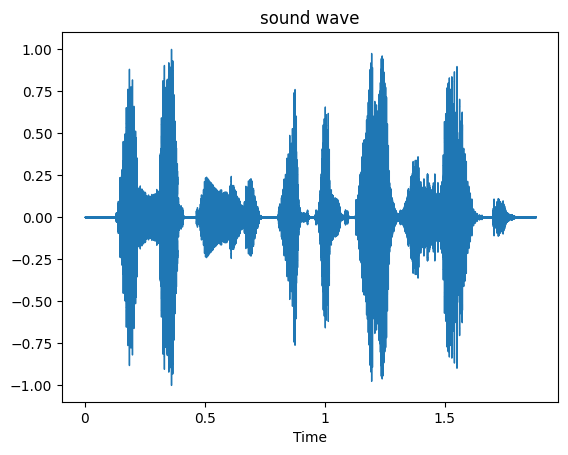

16000


D:\graduate_code\Model4\preprocess\augment.py:43: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  bins_per_octave=bins_per_octave)


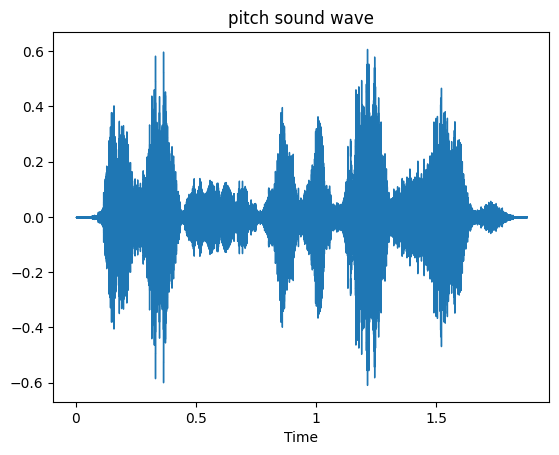

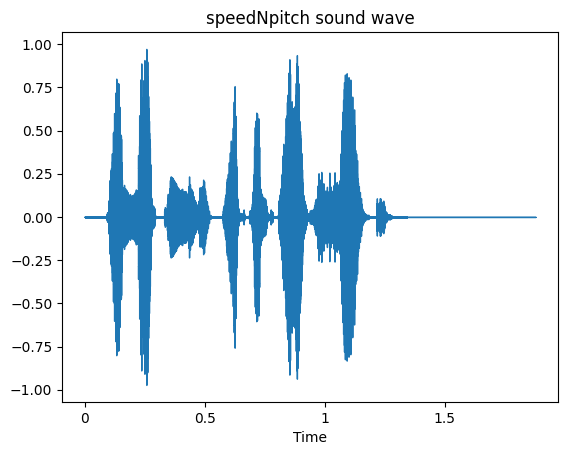

In [48]:
x, sr = librosa.load(wav_files[0], sr=None)  # sr为音频采样率， 设为None即采用原采样率，不写则默认使用22.05khz采样
# 调用librosa包画出波形图
librosa.display.waveshow(x, sr=sr)
# 设置画布标题
plt.title('sound wave')
# 显示画布
plt.show()
print(sr)
origin_x = x

# x = noise(origin_x)
# librosa.display.waveshow(x, sr=sr)
# # 设置画布标题
# plt.title('noise sound wave')
# # 显示画布
# plt.show()
#
# x = shift(origin_x)
# librosa.display.waveshow(x, sr=sr)
# # 设置画布标题
# plt.title('shift sound wave')
# # 显示画布
# plt.show()

# x = dyn_change(origin_x)
# librosa.display.waveshow(x, sr=sr)
# # 设置画布标题
# plt.title('dyn_change sound wave')
# # 显示画布
# plt.show()

x = pitch(origin_x, sample_rate=sr)
librosa.display.waveshow(x, sr=sr)
# 设置画布标题
plt.title('pitch sound wave')
# 显示画布
plt.show()

x = speedNpitch(origin_x)
librosa.display.waveshow(x, sr=sr)
# 设置画布标题
plt.title('speedNpitch sound wave')
# 显示画布
plt.show()

In [62]:
wav = wav_files[0]
# get_mfcc(wav, 6, 0.05)
data, sr = librosa.load(wav, sr=None)
new_wav = noise(data)
print(sr)
print(wav.split('.'))
wav_f = wav.split('.')[0]+"_noise"+".wav"
print(wav_f)
sf.write(wav_f, new_wav, samplerate=sr)


16000
['EmoDB/anger/03a01Wa', 'wav']
EmoDB/anger/03a01Wa_noise.wav


d:\python3_7\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


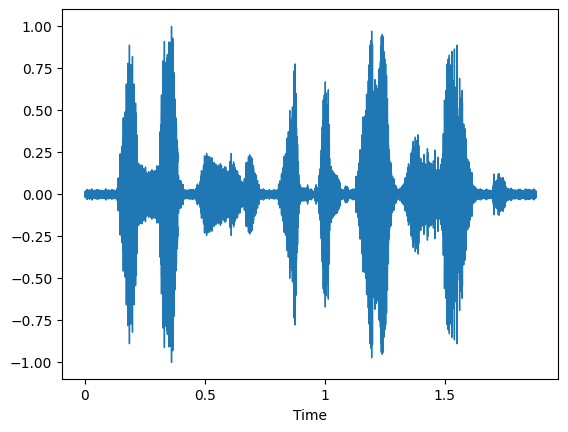

In [63]:
data,sr = librosa.load(wav_f, sr=None)
librosa.display.waveshow(data, sr)
plt.show()

(128, 94)


D:\graduate_code\Model4\preprocess\spec_augment.py:295: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alpha = torch.tensor((queries - floor), dtype=grid_type, device=grid_device)


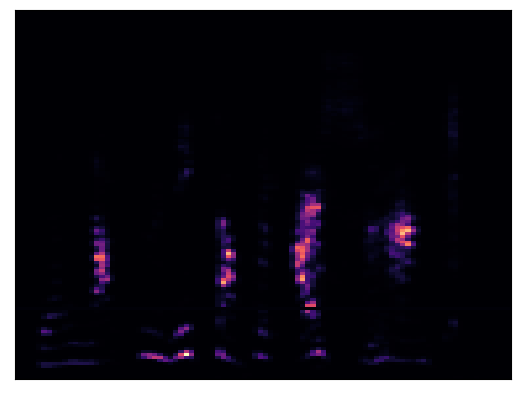

In [18]:
import librosa
import librosa.display
from spec_augment import specaug
import torch
wav_file = "EmoDB/anger/10a01Wa.wav"
data, sr = librosa.load(wav_file)
spec = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128)
# librosa.display.specshow(spec)
print(spec.shape)
spec_a = specaug(torch.from_numpy(spec), 5, 10, 100)
librosa.display.specshow(spec_a.numpy())